In [103]:
#Prediction of species
#load iris dataset
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#as seen, the data is of 150 rows
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris['data'].shape

(150, 4)

In [12]:
import numpy as np
import pandas as pd

In [14]:
np.shape(iris['data'])

(150, 4)

In [22]:
#printing first five rows
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<b>0 means Setosa, 1 means Versicolor, 2 means Virginica</b>


Now import train test split from sklearn.model_selection because splitting the data into 70:30 or any desired ratio helps identifying precision of the model


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=iris['data']
y=iris['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [27]:
X_train.shape

(112, 4)

In [30]:
X_test.shape

(38, 4)

Now splitting of the data is done but visualization of the data is also important. 
So for that import matplotlib.pyplot

In [32]:
import matplotlib.pyplot as plt

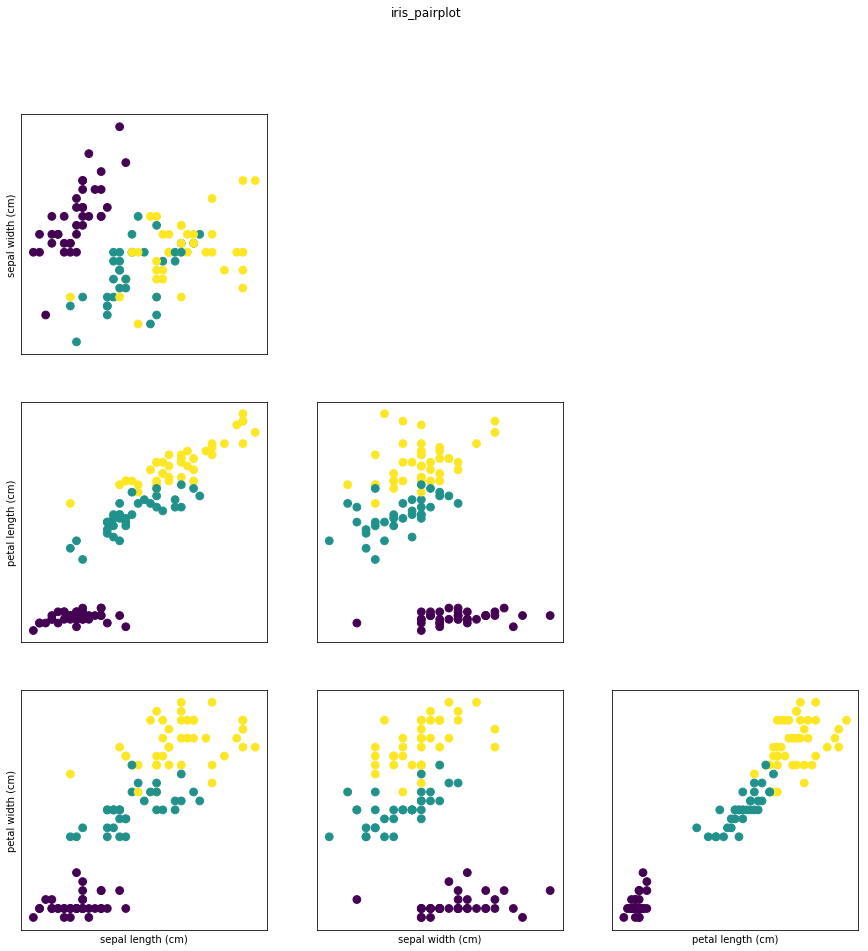

In [58]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
plt.suptitle("iris_pairplot")
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,i+1],c=y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i==2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j==0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j>i:
            ax[i,j].set_visible(False)        

From  the  plots,  we  can  see  that  the  three  classes  seem  to  be  relatively  well  separatedusing  
the  sepal  and  petal  measurements. This  means  that  a  machine  learning  modelwill likely be able to learn to separate them.

In [66]:
#Building your first model: k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [78]:
#Now start making prediction
#To make prediction, create an array with sepal.length,sepal.width, petal.length, petal,width
X_new=np.array([[5,2.5,1,1.2]])

In [86]:
X_new.shape



(1, 4)

In [90]:
prediction=knn.predict(X_new)

In [92]:

iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

<h3>So the above created new array(X_new) belongs to 'setosa'</h3>

In [99]:
#now lets check the accuracy of the model
#for that make prediction for X_test
knn.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [104]:
#now check the score
knn.score(X_test,y_test)*100

97.36842105263158

<h2>So the model is 97.3% accurate</h2>